##                                                           BOOM BIKES CASE STUDY

=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

# 1. Reading and understanding the data 

In [1]:
#Suppress warnings
import warnings
warnings.simplefilter('ignore')

In [2]:
#import required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [3]:
#Read_dataset
df = pd.read_csv('day.csv',index_col='instant')
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Shape of dataset
df.shape

(730, 15)

In [5]:
#Info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


so we can confirm no null values are present in dataset so we can proceed for further analysis

In [6]:
#Description of dataset
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#Assigning categories  for month.

def mnth(x):
    return x.map({
        1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
        7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
    })

df[['mnth']] = df[['mnth']].apply(mnth)


#Assigning categories  for weekday.
def weekday(x):
    if x==1:return 'Monday'
    elif x==2:return 'Tuesday'
    elif x==3:return 'Wednesday'
    elif x==4:return 'Thursday'
    elif x==5:return 'Friday'
    elif x==6:return 'Saturday'
    else:return'Sunday'

df['weekday']=df['weekday'].apply(weekday)

#Assigning categories  for season.
def season(x):
    if x==1:return 'spring'
    elif x==2:return 'summer'
    elif x==3:return 'fall'
    else:return'winter'

df['season']=df['season'].apply(season)

#Assigning categories  for weathersit.
def weathersit(x):
    if x==1:return 'Clear'
    elif x==2:return 'Mist'
    elif x==3:return 'Light Snow'
    else:return'Heavy Rain'
    
df['weathersit']=df['weathersit'].apply(weathersit)  

In [8]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,spring,0,Jan,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,spring,0,Jan,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
#Checking Datatypes 
df.dtypes

dteday         object
season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [10]:
# date to datetime format
df['dteday'] = df['dteday'].astype('datetime64')
df.dtypes

dteday        datetime64[ns]
season                object
yr                     int64
mnth                  object
holiday                int64
weekday               object
workingday             int64
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

# 2. Visualizing the data and preparing data for making model

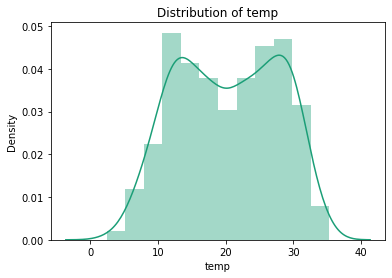

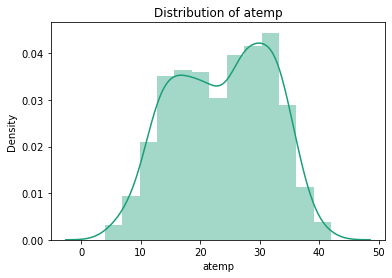

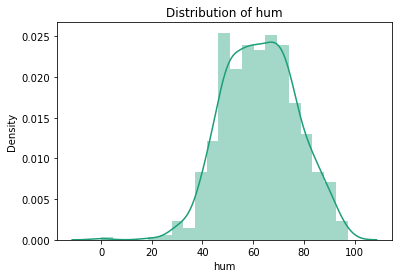

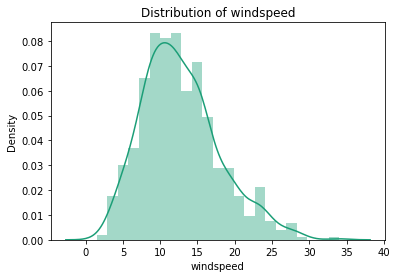

In [11]:
#Checking the distribution of some variables 

variables=['temp','atemp','hum','windspeed']

for col in variables:
    sns.set_palette('Dark2')
    sns.distplot(df[col])
    plt.title('Distribution of '+col)
    plt.show()
    print("======================================")

* Inference of above plot
1.windspeed and humidity is having good normal distribution

In [12]:
# Categorical

df_categorical = df.select_dtypes(exclude=['float64','int64','datetime64'])

df_categorical

,season,mnth,weekday,weathersit
instant,,,,
1,spring,Jan,Monday,Mist
2,spring,Jan,Tuesday,Mist
3,spring,Jan,Wednesday,Clear
4,spring,Jan,Thursday,Clear
5,spring,Jan,Friday,Clear
...,...,...,...,...
726,spring,Dec,Friday,Mist
727,spring,Dec,Saturday,Mist
728,spring,Dec,Sunday,Mist


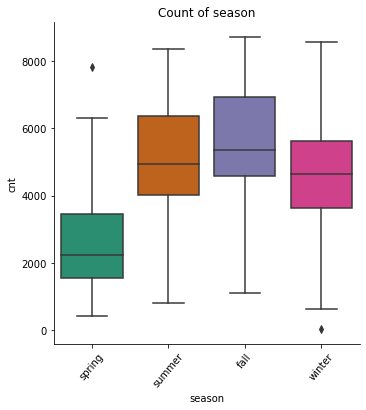

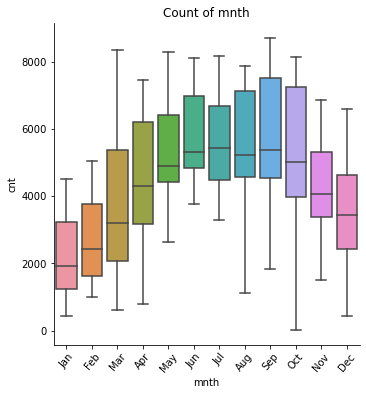

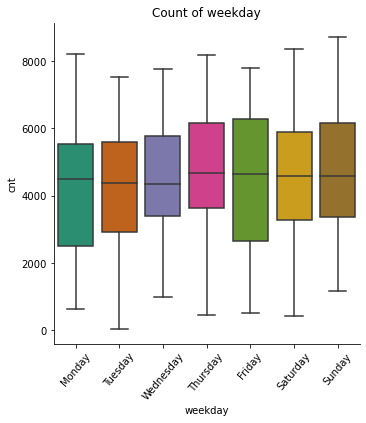

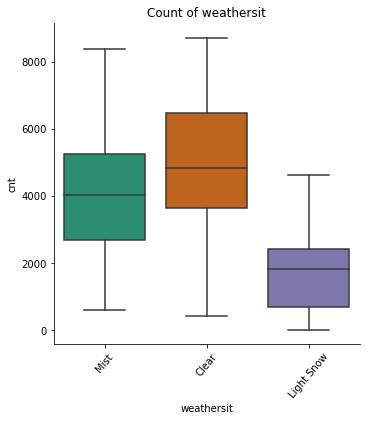

In [13]:
variables=df_categorical.columns

for col in variables:
    sns.set_palette('Dark2')
    sns.catplot(x=col,y='cnt',data=df,kind='box',sharex=False)
    plt.title('Count of '+col)
    plt.xticks(rotation=50)
    plt.show()
    print("======================================")

## Inferences from the above pair plot

1. Summer and fall in seasons having good bookings like wise from april to sep is having
2. light Snow is really a bad condition for bookings. 

In [14]:
#changing datatypes of numerical columns to appropriate types

df[['casual','registered','cnt']]=df[['casual','registered','cnt']].astype('float')

In [15]:
df_numeric = df.select_dtypes(include=['float64'])
df_numeric

,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,
1,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
2,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
3,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
4,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
5,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...
726,10.420847,11.33210,65.2917,23.458911,247.0,1867.0,2114.0
727,10.386653,12.75230,59.0000,10.416557,644.0,2451.0,3095.0
728,10.386653,12.12000,75.2917,8.333661,159.0,1182.0,1341.0


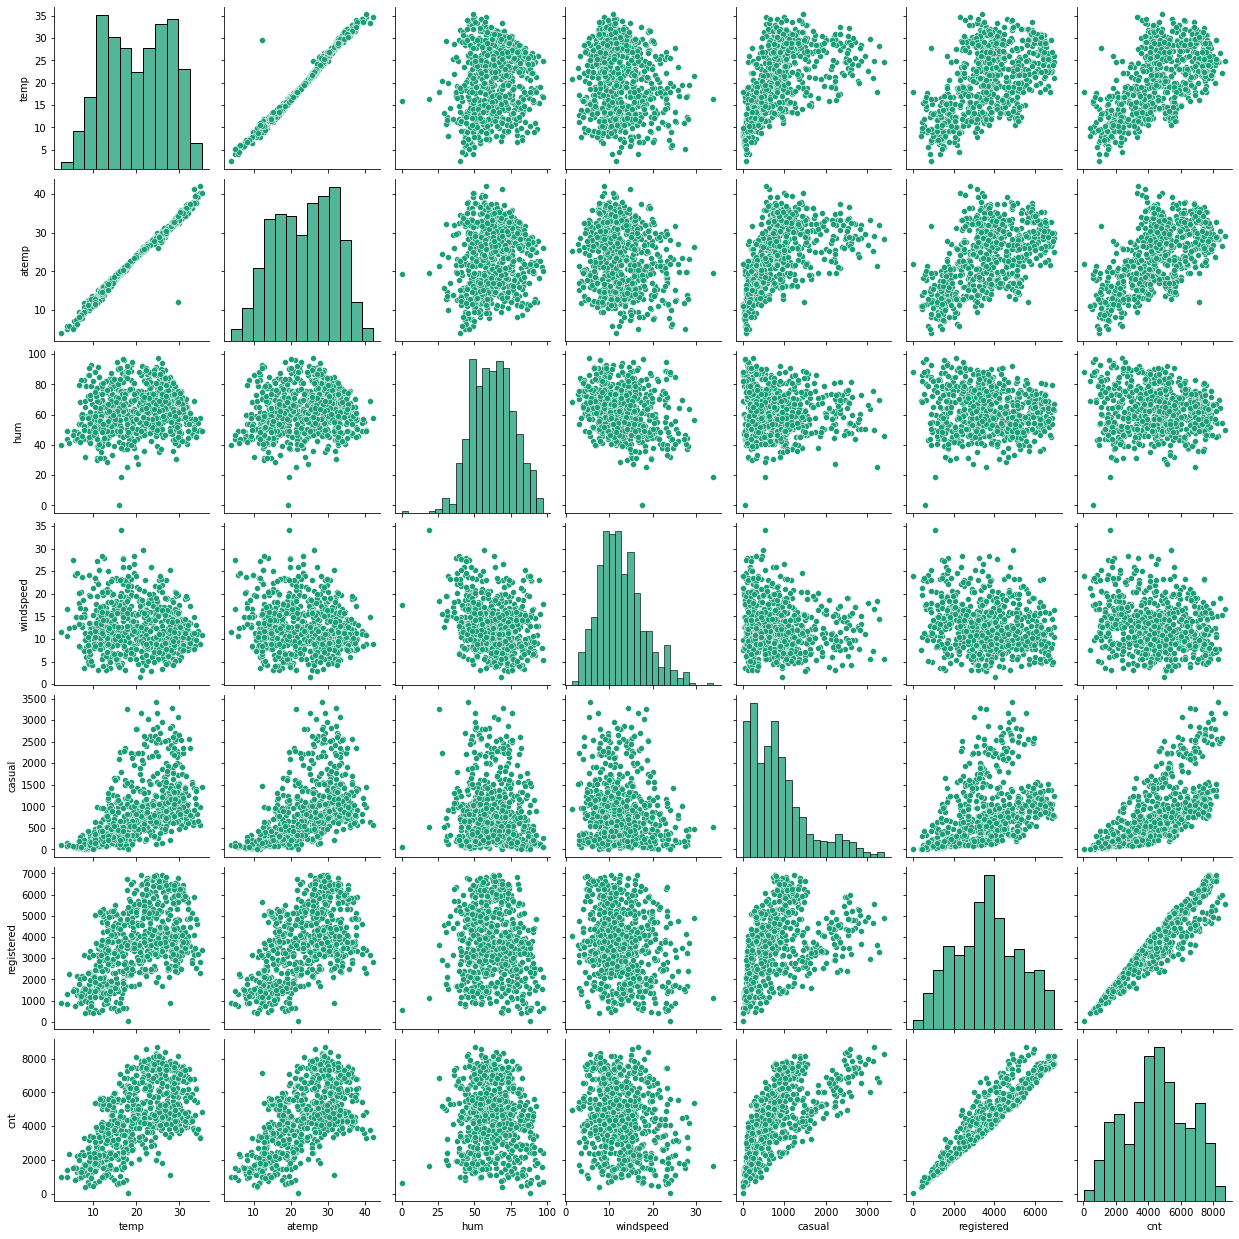

In [16]:
sns.pairplot(df_numeric)
plt.show();

## Inferences from the above pair plot

1. There is not so useful patterns in the above plot.
2. We can see some sort of linear relationship between temp and count. 

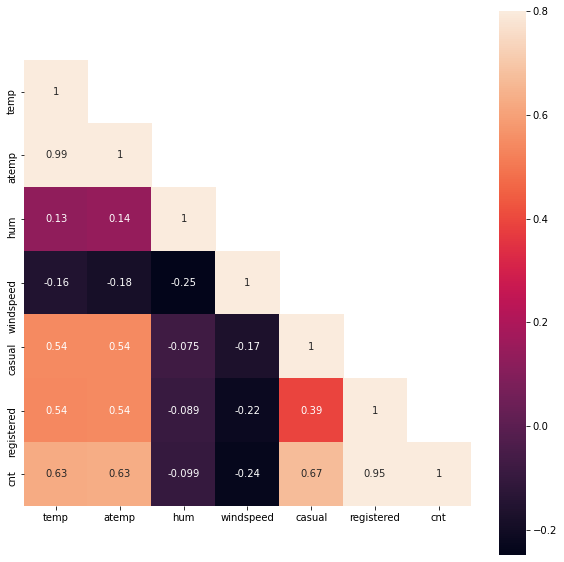

In [17]:
# heatmap

cor = df_numeric.corr()

mask = np.array(cor)
mask[ np.tril_indices_from(mask) ] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask, vmax=0.8, square=True, annot=True);

* So we are having temp and atemp both are correlated so we can drop one it won't show any much impact on model

In [18]:
df.drop('atemp',axis=1,inplace=True)

# 3 . Data Preparation

here casual and registred sum upto cnt so should drop them

In [19]:
df.drop(columns=['dteday','casual','registered'],axis=1,inplace=True)

In [20]:
df_categorical.head()

,season,mnth,weekday,weathersit
instant,,,,
1,spring,Jan,Monday,Mist
2,spring,Jan,Tuesday,Mist
3,spring,Jan,Wednesday,Clear
4,spring,Jan,Thursday,Clear
5,spring,Jan,Friday,Clear


In [21]:
# Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [22]:
set(df.describe().columns)

{'cnt', 'holiday', 'hum', 'temp', 'windspeed', 'workingday', 'yr'}

In [23]:
# Stardising values in variables
var = ['temp', 'hum','windspeed','cnt']
df[var] = scaler.fit_transform(df[var])

In [24]:
# Dummy Variables

df_dummies = pd.get_dummies(df_categorical, drop_first=True)

In [25]:
df_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df = df.drop(list(df_categorical.columns), axis=1)

In [27]:
df = pd.concat([df, df_dummies], axis=1)

In [28]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0.355170,0.828620,0.284606,0.110792,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0.379232,0.715771,0.466215,0.089623,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,1,0.171000,0.449638,0.465740,0.152669,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0.175530,0.607131,0.284297,0.177174,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,1,0.209120,0.449313,0.339143,0.181546,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X = df.drop('cnt',axis=1)
y = df.cnt

In [30]:
print(X.shape)
print(y.shape)

(730, 28)
(730,)


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [32]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(584, 28)
(584,)
(146, 28)
(146,)


## Model 1

In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [34]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
yr,0.232103
holiday,-0.126731
workingday,-0.062546
temp,0.408983
hum,-0.177133
windspeed,-0.179405
season_spring,-0.096237
season_summer,0.013812
season_winter,0.070389
mnth_Aug,-0.008281


In [35]:
print(regressor.intercept_)

0.45685009988540765


In [36]:
# Predictions

y_pred = regressor.predict(X_test)

In [37]:
df1 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1

,Actual,Predicted
instant,,
249,0.309250,0.201074
299,0.445467,0.483761
160,0.447883,0.598976
661,0.856420,0.802833
512,0.755752,0.770299
...,...,...
635,0.848021,0.858150
511,0.749425,0.814963
695,0.582720,0.652552


In [38]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.062228210579039274
Mean Squared Error: 0.006471091385250719
Root Mean Squared Error: 0.08044309408054068


In [39]:
# Train data r_squared, adjusted_r_squared

yhat = regressor.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8348197990069095 0.8264863834613121


In [40]:
# Test data r_squared, adjusted_r_squared

yhat = regressor.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8814447978761759 0.8530726127525257


# RFE:

28 features. Out of these, we will reduce it to 12 features(arbitarily chosen)

In [41]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [43]:
rfe = RFE(lm, 12)
rfe = rfe.fit(X_train, y_train)

In [44]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 14),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 15),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 3),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 16),
 ('mnth_Mar', False, 12),
 ('mnth_May', False, 5),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', False, 7),
 ('weekday_Sunday', False, 8),
 ('weekday_Thursday', False, 17),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 11),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', False, 4)]

In [45]:
(rfe.support_==True).sum()

12

In [46]:
(rfe.support_==False).sum()

16

In [47]:
rfe.ranking_

array([ 1,  1,  6,  1,  1,  1,  1, 14,  1, 15,  1,  3,  2,  1, 16, 12,  5,
        1, 13,  1,  9,  7,  8, 17, 10, 11,  1,  4])

In [48]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weathersit_Light Snow'],
      dtype='object')

In [49]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [50]:
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,season_spring,season_winter,mnth_Dec,mnth_Jul,mnth_Nov,mnth_Sep,weathersit_Light Snow
instant,,,,,,,,,,,,
69,0,0,0.411147,0.000000,0.493712,1,0,0,0,0,0,1
77,0,0,0.599187,0.540069,0.430092,1,0,0,0,0,0,0
616,1,0,0.747675,0.821766,0.533349,0,0,0,0,0,1,0
714,1,0,0.330249,0.668809,0.173084,0,1,1,0,0,0,0
140,0,0,0.595034,0.739931,0.211559,0,0,0,0,0,0,0


## Model 2

In [51]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [52]:
X=sm.add_constant(X_train_rfe) #Adding the constant

lm = sm.OLS(y_train,X).fit() # fitting the model

print(lm.summary()) # model summary

checkVIF(X.drop(['const'], axis=1))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     213.6
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          4.81e-202
Time:                        23:32:36   Log-Likelihood:                 554.09
No. Observations:                 584   AIC:                            -1082.
Df Residuals:                     571   BIC:                            -1025.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.42

,Features,VIF
3,hum,15.50
2,temp,14.27
4,windspeed,4.91
6,season_winter,2.87
5,season_spring,2.41
0,yr,2.00
9,mnth_Nov,1.90
8,mnth_Jul,1.50
7,mnth_Dec,1.43
10,mnth_Sep,1.23


In [53]:
X1=X.drop('hum',axis=1)
X1.shape

(584, 12)

## Model 3

In [54]:
X1=sm.add_constant(X1) #Adding the constant

lm1 = sm.OLS(y_train,X1).fit() # fitting the model

print(lm1.summary()) # model summary

checkVIF(X1.drop(['const'], axis=1))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     199.8
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          9.17e-188
Time:                        23:32:36   Log-Likelihood:                 517.57
No. Observations:                 584   AIC:                            -1011.
Df Residuals:                     572   BIC:                            -958.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

,Features,VIF
2,temp,5.13
3,windspeed,4.88
5,season_winter,2.50
0,yr,2.00
8,mnth_Nov,1.88
4,season_spring,1.71
7,mnth_Jul,1.43
6,mnth_Dec,1.39
9,mnth_Sep,1.22
10,weathersit_Light Snow,1.06


In [55]:
X2=X1.drop('temp',axis=1)
X2.shape

(584, 11)

## Model 3

In [56]:
X2=sm.add_constant(X2) #Adding the constant

lm2 = sm.OLS(y_train,X2).fit() # fitting the model

print(lm2.summary()) # model summary

checkVIF(X2.drop(['const'], axis=1))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     158.5
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          8.48e-158
Time:                        23:32:37   Log-Likelihood:                 444.16
No. Observations:                 584   AIC:                            -866.3
Df Residuals:                     573   BIC:                            -818.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.53

,Features,VIF
2,windspeed,2.49
4,season_winter,2.47
7,mnth_Nov,1.86
0,yr,1.82
3,season_spring,1.57
5,mnth_Dec,1.38
6,mnth_Jul,1.13
8,mnth_Sep,1.12
9,weathersit_Light Snow,1.06
1,holiday,1.05


#### By Droping temp from our model we are getting drop in r2 score is high so we are considering to drop next high vif value variable in data thats windspeed

In [57]:
X3=X1.drop('windspeed',axis=1)
X3.shape

(584, 11)

## Model 4

In [58]:
X3=sm.add_constant(X3) #Adding the constant

lm3 = sm.OLS(y_train,X3).fit() # fitting the model

print(lm3.summary()) # model summary

checkVIF(X3.drop(['const'], axis=1))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     208.8
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          9.05e-184
Time:                        23:32:37   Log-Likelihood:                 505.38
No. Observations:                 584   AIC:                            -988.8
Df Residuals:                     573   BIC:                            -940.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

,Features,VIF
2,temp,2.62
4,season_winter,2.48
0,yr,1.99
7,mnth_Nov,1.86
5,mnth_Dec,1.38
6,mnth_Jul,1.38
3,season_spring,1.26
8,mnth_Sep,1.20
1,holiday,1.05
9,weathersit_Light Snow,1.04


## 4.Model Evaluation and residual analysis

In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [60]:
X_test=X_test[X3.drop('const',axis=1).columns]
X_test= sm.add_constant(X_test)

In [61]:
#CALCULATING RESIDUALS

y_test_pred=lm3.predict(X_test)

y_train_pred=lm3.predict(X3)


res=y_train - y_train_pred

Text(0.5, 0, 'Errors')

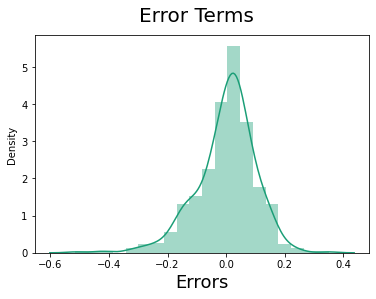

In [62]:
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

So we can say error values are normally distributed

In [63]:
r2_score(y_train,y_train_pred)

0.7847076730168854

In [64]:
r2_score(y_test,y_test_pred)

0.8487888953099374

Text(0, 0.5, 'y_test_pred')

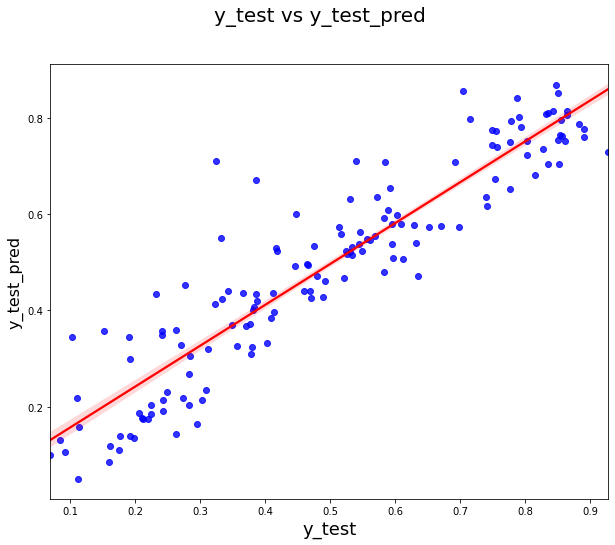

In [65]:
fig = plt.figure(figsize=[10,8])
sns.regplot(x=y_test,y=y_test_pred,ci=68,fit_reg=True,scatter_kws={"color":"blue"},line_kws={'color':'red'})
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                               # X-label
plt.ylabel('y_test_pred', fontsize = 16)   

Text(0, 0.5, 'y_train_pred')

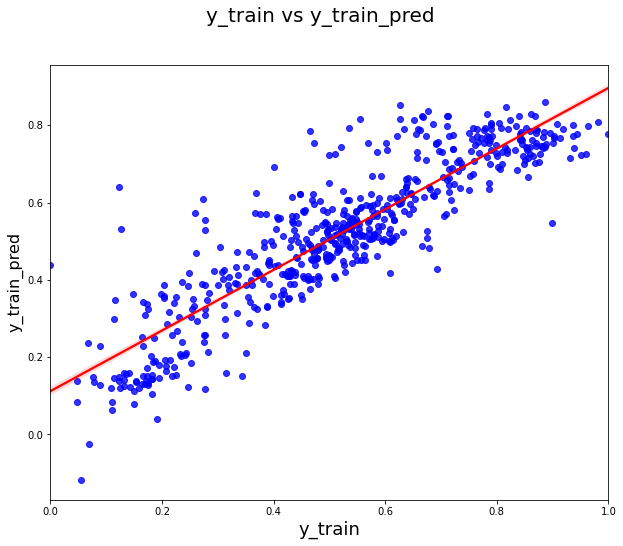

In [66]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=[10,8])
sns.regplot(x=y_train,y=y_train_pred,ci=68,fit_reg=True,scatter_kws={"color":"blue"},line_kws={'color':'red'})
fig.suptitle('y_train vs y_train_pred', fontsize=20)# Plot heading 
plt.xlabel('y_train', fontsize=18)# X-label
plt.ylabel('y_train_pred', fontsize=16)# Y-label

In [67]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 0.06824449844355798
Mean Squared Error: 0.00825354652841063
Root Mean Squared Error: 0.09084903152158877


# We can see that the equation for best fitted line is:

### cnt = (0.2372 * yr) - (0.0771 * holiday ) + (0.4359 * temp )  - (0.1296 * Season_spring) + (0.0684 * Season_winter)- (0.05 * mnth_Dec) - (0.0457 * mnth_Nov) + (0.0481 * mnth_Sep) - (0.051 * mnth_  jul) - (0.2669*  weathersit_Light Snow)

In [68]:
from sklearn.feature_selection import SelectKBest,f_classif

X = X3  #independent columns
y = y_train


#apply SelectKBest class to extract top 3 best features
bestfeatures = SelectKBest(score_func=f_classif, k=3)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns


print(featureScores.nlargest(3,'Score'))  #print 3 best features

           Specs     Score
4  season_spring  1.379902
1             yr  1.291453
3           temp  1.266239


Best 3 features for model are temp,yr and season spring

In [69]:
df_test = pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})

X = df_test.iloc[:, :-1].values
y = df_test.iloc[:, 1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)

print(regressor.coef_)

0.06608952741033991
[0.85836442]
